<a href="https://colab.research.google.com/github/Islom-Radjapov/Supermarket_sales/blob/main/market_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/sotuvlar.csv", sep=',')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Branch - Fillial (A,B yoki C)

City - Joylashgan shahar

Customer type - Mijoz turui - Member(Maxsus klent - karta ochtirgan), Normal - 
Oddiy klent

Product line - Sotib olingan mahsulot qaysi bo'limga tegishli:  Electronic 
accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price - Bir birlik mahsulot narxi

Quantity - Sotib olingan mahsulot soni

Tax - 5% li Soliq

Total - Soliqni qo'shgan holda  hisoblangan ummiy narx

Payment - To'lov turi (Cash-naqd, Credit-kredit karta, Ewallet-elektron hamyon)

COGS - Tannarxi

Gross margin percentage = (Jami daromad – sotilgan mahsulot tannarxi)/Jami daromad x 100

Gross income - yalpi daromad

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [ ]:
Yangon = df.query("City == 'Yangon'")          # Yangon filaliga tegishli malumot
Yangon_sum = Yangon['Quantity'].sum()          # Yangon filalidagi barcha sotilgan maxsulotlar 

Naypyitaw = df.query("City == 'Naypyitaw'")    # Naypiyaw filaliga tegishli malumot
Naypyitaw_sum = Naypyitaw['Quantity'].sum()    # Naypiyaw filalidagi barcha sotilgan maxsulotlar 

Mandalay= df.query("City == 'Mandalay'")       # Mandalay filaliga tegishli malumot
Mandalay_sum = Mandalay['Quantity'].sum()      # Mandalay filalidagi barcha sotilgan maxsulotlar 

quantity_sum_all = [Yangon_sum, Naypyitaw_sum, Mandalay_sum ]      # Filallardaga sotilgan maxsulotlar soni 

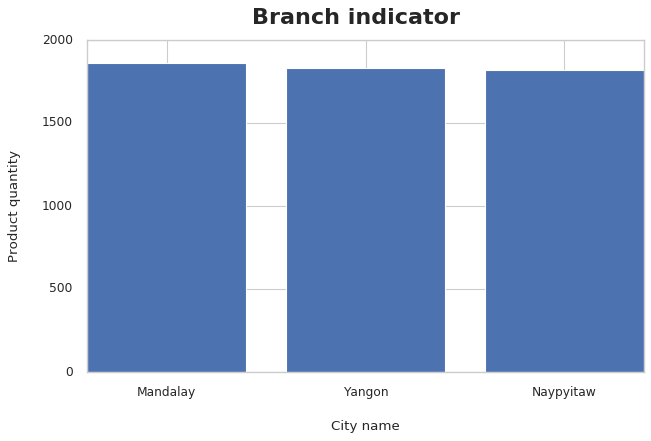

In [ ]:
# Har bir filalda sotilgan barcha maxsulotlarni vizuvalizatsiyasi
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(list(set(df['City'])), quantity_sum_all)
ax.set( xlabel='\nCity name', ylabel='Product quantity\n')
plt.suptitle('Branch indicator',fontsize='20',fontweight='bold')
plt.show()

Filiallarda 3-oyda sotilgan barcha maxsulotlar. 
Yangon-1859,  Naypyitaw-1831,  Mandalay-1820

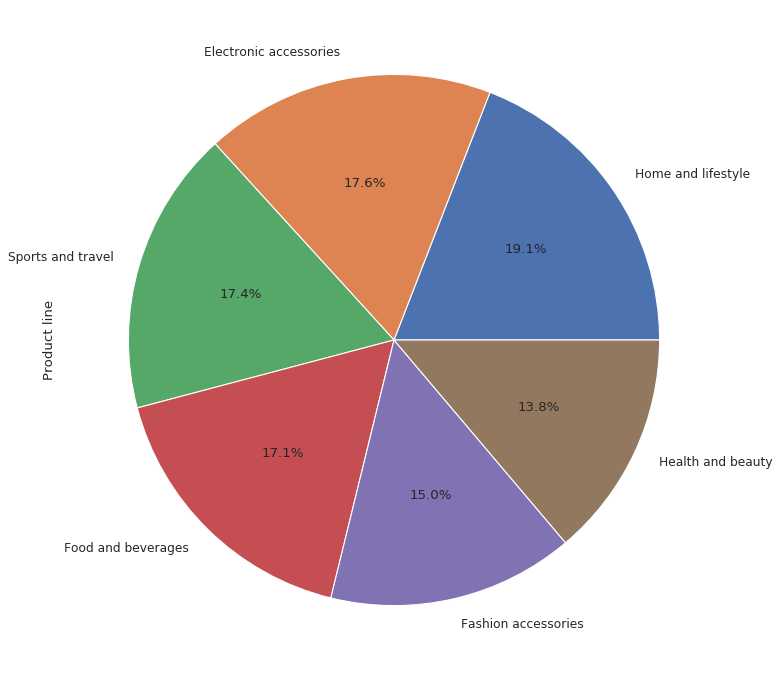

In [ ]:
# Yangon filalini maxsulotlar turi boyicha sotuv korsatkichi
plt.figure(figsize=(20,10))
Yangon["Product line"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

Yangon filalida asosiy sotiladigan maxsulot bu uy va hayot tarzi uchun kerakli bolgan buyumlar (maxsulot sonini va hajmini kopaytirish kerak imkon bolsa narxini tushirish kerak va yetkazib berish hizmatini yo'lga qo'yish lozim)  

Salomatlik va go'zallik maxsulotlarini sotib olish middorini kamaytirish lozim 

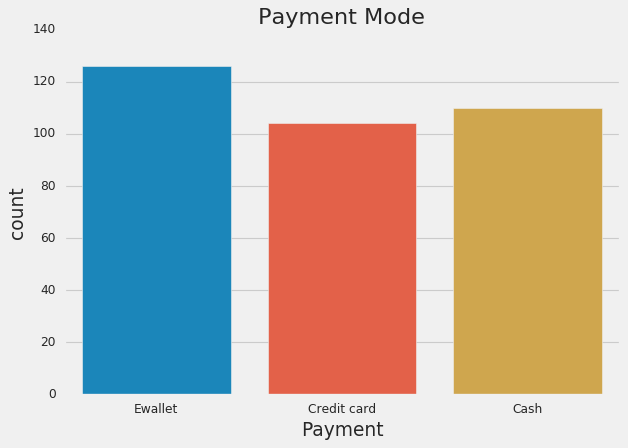

In [ ]:
# Yangon filali tolov shakli korsatkichi
plt.style.use('fivethirtyeight')
sns.countplot(x="Payment", data =Yangon).set_title("Payment Mode")
plt.show()

Aholini kop qismi internet hamyondan foydalanadi

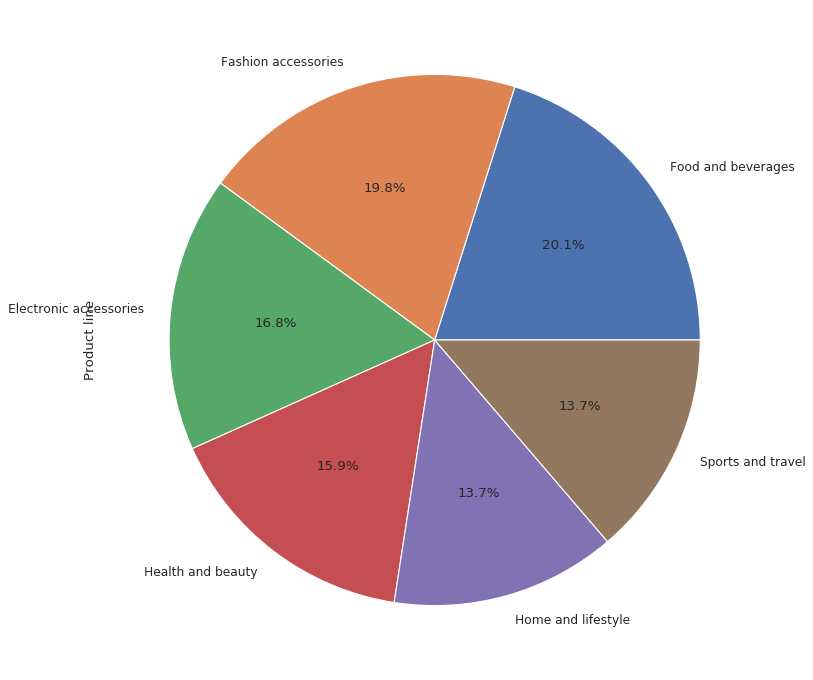

In [ ]:
# Naypyitaw filalini maxsulotlar turi boyicha sotuv korsatkichi
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
Naypyitaw["Product line"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

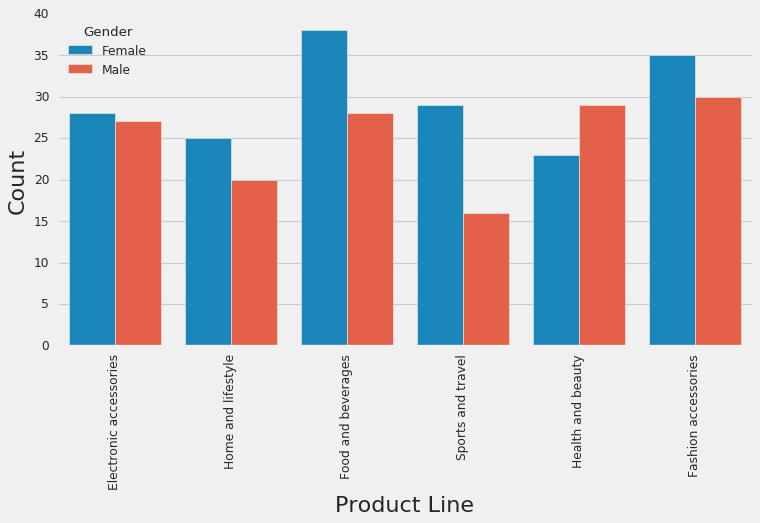

In [ ]:
# Maxsulotlarni sotib oluvchilar turi
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.countplot(x='Product line', data=Naypyitaw, hue='Gender')
plt.xlabel('Product Line', fontsize=20)
plt.ylabel('Count', fontsize=20);

Naypitaw filalidagi oziq-ovqat, ichimliklar va moda aksessuarlari kop miqdorda sotiladi, haridorlarni kopro qismini erkaklar tashkil etadi ( maxsulot sonini va hajmini kopaytirish kerak ayniqsa erkaklar uchun oziq-ovqat, ichimliklarni) 

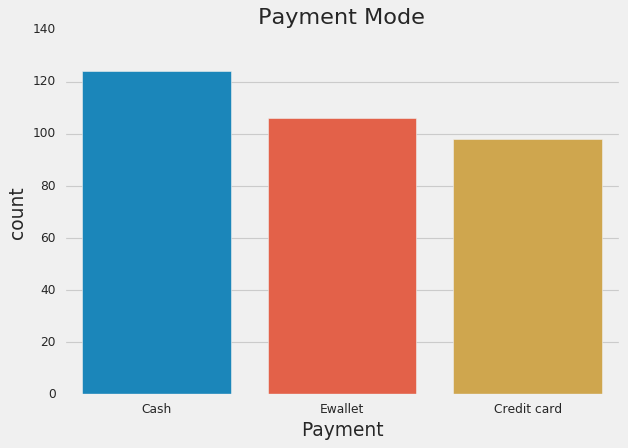

In [ ]:
plt.style.use('fivethirtyeight')
sns.countplot(x="Payment", data =Naypyitaw).set_title("Payment Mode")
plt.show()

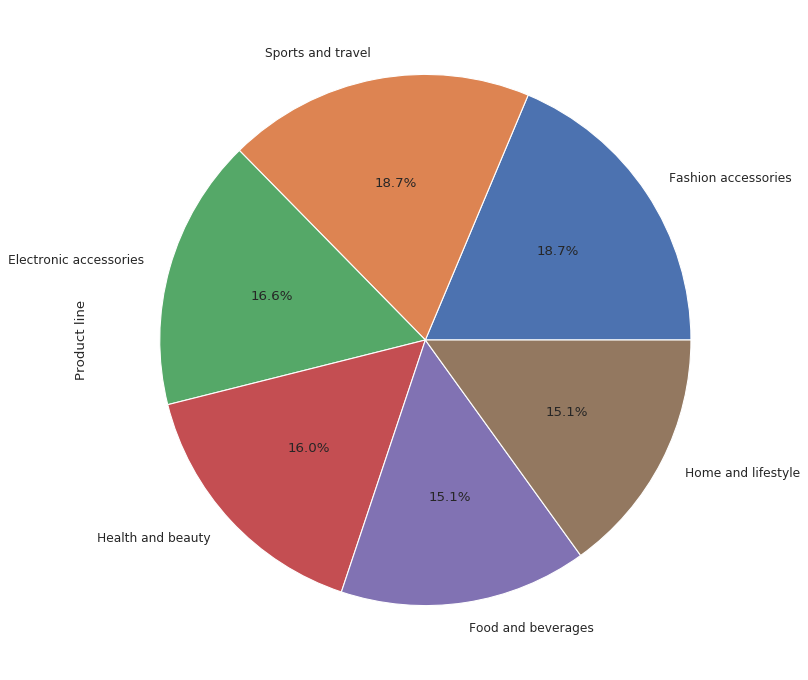

In [ ]:
# Mandalay filalini maxsulotlar turi boyicha sotuv korsatkichi
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
Mandalay["Product line"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

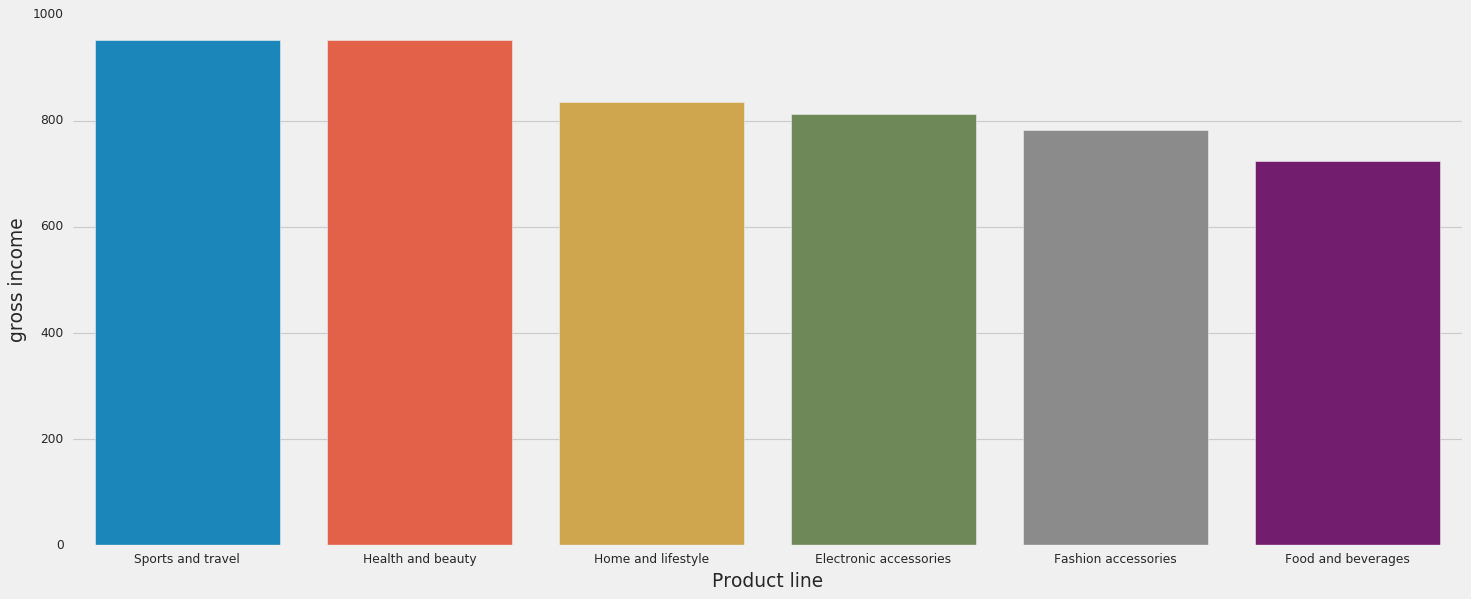

In [ ]:
income = Mandalay[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum()   # Mandalay filali maxsulotlar daromadlari 
income_sort = income.sort_values(by='gross income', ascending=False)       # Daromadlarni kamayish tartibida tartiblash

# Mandalay filali maxsulotlarni daromad korsatkichi
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=income_sort)
plt.show()

Sport, sog'liq, go'zallik va sayohat maxsulotlarini davlat soliqi ham foydasi ham yaxshi

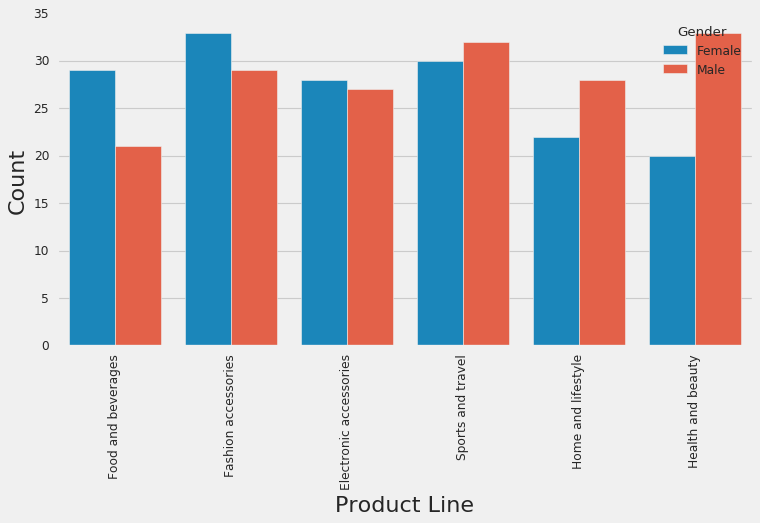

In [ ]:
# Maxsulotlar boyicha haridorlar turi
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.countplot(x='Product line', data=Mandalay, hue='Gender')
plt.xlabel('Product Line', fontsize=20)
plt.ylabel('Count', fontsize=20);

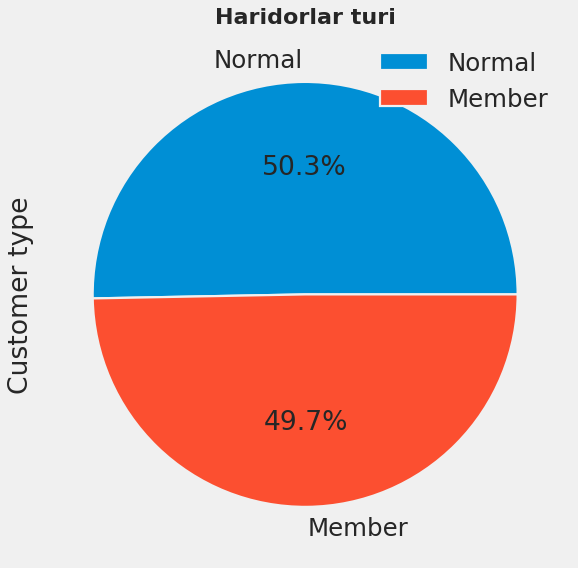

In [ ]:
# Haridorlar turi 
sns.set_context("poster")
plt.figure(figsize=(10,8))
Mandalay["Customer type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.legend()
plt.title('Haridorlar turi', fontsize=20,fontweight='bold')
plt.show()

Maxsus haridorlar odiy haridorlardan pirozgina kamroq ekan

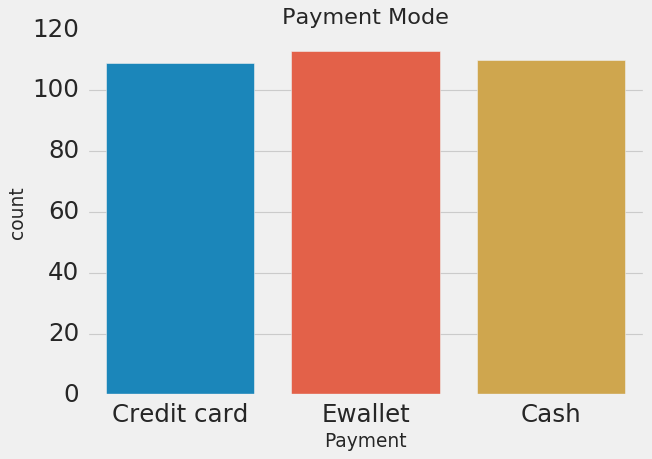

In [ ]:
plt.style.use('fivethirtyeight')
sns.countplot(x="Payment", data =Mandalay).set_title("Payment Mode")
plt.show()

Mandalay filalida Sport va sayohat uchun buyumlar va salomatlik va go'zallik maxsulotlari yaxshi foyda keltiradi, haridorlarni kop qismini ayollar ayniqsa salomatlik va go'zallik bo'lim haridorlari (maxsulot turini kopaytirish kerak va marketing qilib narxni biroz oshirsa boladi)